In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from src.EXPM import EXPM
from src.CascadeBandit import CascadeBandit
from src.UCB import UCBM
from env.bandit_env import MAB_Bernoulli
from env.movielens_env import Movielens
from src.bandit_utils import play_all

In [2]:
from env.adv_env import Bernoulli_adv_dependent
from src.UCB import UCBM
from src.comband import CombBand, _dumb_sampling

rng = np.random.default_rng(seed = 42)
T = 100_000
N = 10
K = 20
M = 5

env = Bernoulli_adv_dependent(K, M, T, seed = 42)

expm = EXPM(K, M)
casc = CascadeBandit(K, M, method='UCB')
casc_kl = CascadeBandit(K, M, method='KL-UCB')
cb = CombBand(K,M,sampling_function=_dumb_sampling)
#
res = play_all(env, [cb, expm, casc, casc_kl], T, N, disable_tqdm_T = True)

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

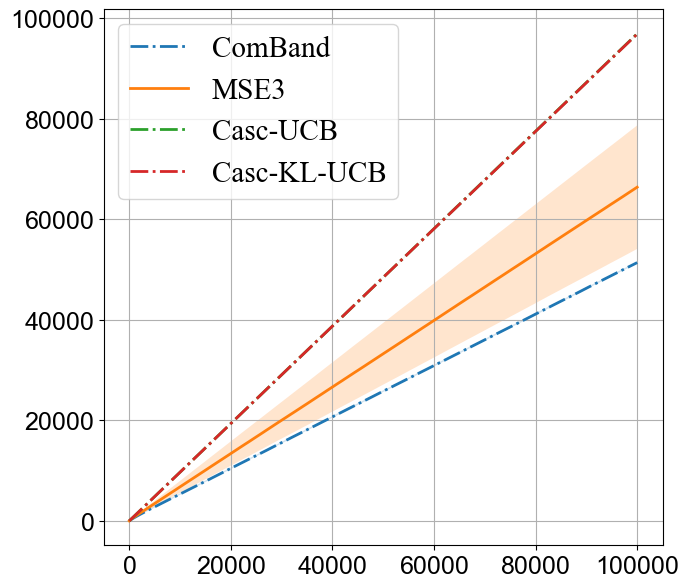

In [8]:
from src.bandit_utils import plot_results
plot_results(res, path = './results/synth/LowerBound.pdf')